# Predictive Modeling for Tax_due Prediction Using Machine Learning.

## Name :Thasleema.k

## Organization : EntryElevate

## Submission date : 25/09/2024

## Table of Contents

1.Overview of Problem Statement

2.Objective

3.Data Collection

4.Data Description

5.Exploratory Data Analysis (EDA)

6.Data Preprocessing

7.Visualization

8.Feature Engineering

9.Data Splitting

10.Model Selection

11.Model Training & Evaluation

12.Feature Selection

13.Model Evaluation

14.Hyperparameter Tuning

15.Results

16.Model Deployment

17.Limitations

18.Conclusion

## 1. Overview of Problem Statement

### The problem statement can be summarized as follows:

* #### 1.Business Challenge:

#### Residential property owners need to understand the factors that significantly impact their tax. By accurately predicting the tax, they can make informed decisions regarding pricing and customer engagement.


* #### 2.Technical Challenge:

#### The real-estate dataset includes both numerical and categorical features, requiring appropriate preprocessing and feature engineering. Identifying the most relevant features that contribute to tax_due prediction. Developing and evaluating different machine learning models to find the best-performing one for predicting tax_due.

## 2. Objective

### To develop a predictive model that accurately forecasts the tax of residential property based on a variety of factors and other relevant attributes. The ultimate goal is to provide actionable insights that property owners can use to optimize their operations.

In [1]:
# Ignore warninggs
import warnings
warnings.filterwarnings('ignore')
#this code is used to supress warning messages.

## 3.Data Collection

In [2]:
# this code reads the dataset from csv file located at the specified path into a pandas dataframe named "df"
import pandas as pd
df=pd.read_csv("C:\\Users\\Faheem\\Downloads\\residential-property-tax-payments-from-2010-to-current-1.csv")
df

,YR,BILL_TYPE,BILL_NUM,PARCEL_ID,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,ZIP1,ZIP2,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD,BILLED,PAID,TAX_DUE
0,2010,Residential,12351,264169027,LYTTLETON PRISCILLA,LYTTLETON KEITHTOUS,297 BELLEVUE ST,NaN,HARTFORD,CT,6120,2104,303,BELLEVUE ST,NaN,891.34,62.18,829.16
1,2010,Residential,5621,142707053,CZARNECKI EUGENE B,NaN,809 NEW BRITAIN AV,NaN,HARTFORD,CT,6106,3918,809,NEW BRITAIN AV,Y,0.00,0.00,0.00
2,2010,Residential,19109,203423193,SOUTHERN NEW ENGLAND CONFERENC,NaN,PO Box 269,NaN,HARTFORD,CT,6141,0,156,RUSS ST,Y,1458.38,1458.38,0.00
3,2010,Residential,2671,284074072,BROWN DERMOTH H,NaN,3372 MAIN ST,NaN,HARTFORD,CT,6120,1109,3364,MAIN ST,NaN,2373.16,1916.40,456.76
4,2010,Residential,17625,221270024,ROSCOE THOMAS,NaN,228 DAVENTRY DR,NaN,DEBARY,FL,32713,2137,312,GARDEN ST,NaN,2381.56,2381.56,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136040,2017,Residential,25380,227544074,WASHINGTON DEVELOPERS LLC,NaN,5 MARINA VIEW DR,NaN,CHESTER,CT,6412,0,323-327,WASHINGTON ST,NaN,1216.06,0.00,1216.06
136041,2017,Residential,16312,147018080,CASTLEROCK 2017 LLC,NaN,333 WESTCHESTER AV WEST BUILDI,NaN,WHITE PLAINS,NY,10604,0,161,HAROLD ST,NaN,2592.94,0.00,2592.94
136042,2017,Residential,11083,193055038,IRVING VIOLET LOUISE,NaN,111 EAST 14TH STREET,c/o Mark Irving,NEW YORK,NY,10003,0,27,WOODSTOCK ST,NaN,2193.42,0.00,2193.42
136043,2017,Residential,25174,999999064,CROWN GARDENS,NaN,PROPERTY SERVICES INC,PO BOX 330487,WEST HARTFORD,CT,6133,0,26,ENFIELD ST,NaN,0.00,0.00,0.00


In [3]:
df.head()

,YR,BILL_TYPE,BILL_NUM,PARCEL_ID,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,ZIP1,ZIP2,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD,BILLED,PAID,TAX_DUE
0,2010,Residential,12351,264169027,LYTTLETON PRISCILLA,LYTTLETON KEITHTOUS,297 BELLEVUE ST,NaN,HARTFORD,CT,6120,2104,303,BELLEVUE ST,NaN,891.34,62.18,829.16
1,2010,Residential,5621,142707053,CZARNECKI EUGENE B,NaN,809 NEW BRITAIN AV,NaN,HARTFORD,CT,6106,3918,809,NEW BRITAIN AV,Y,0.00,0.00,0.00
2,2010,Residential,19109,203423193,SOUTHERN NEW ENGLAND CONFERENC,NaN,PO Box 269,NaN,HARTFORD,CT,6141,0,156,RUSS ST,Y,1458.38,1458.38,0.00
3,2010,Residential,2671,284074072,BROWN DERMOTH H,NaN,3372 MAIN ST,NaN,HARTFORD,CT,6120,1109,3364,MAIN ST,NaN,2373.16,1916.40,456.76
4,2010,Residential,17625,221270024,ROSCOE THOMAS,NaN,228 DAVENTRY DR,NaN,DEBARY,FL,32713,2137,312,GARDEN ST,NaN,2381.56,2381.56,0.00


In [4]:
df.tail()

,YR,BILL_TYPE,BILL_NUM,PARCEL_ID,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,ZIP1,ZIP2,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD,BILLED,PAID,TAX_DUE
136040,2017,Residential,25380,227544074,WASHINGTON DEVELOPERS LLC,NaN,5 MARINA VIEW DR,NaN,CHESTER,CT,6412,0,323-327,WASHINGTON ST,NaN,1216.06,0.0,1216.06
136041,2017,Residential,16312,147018080,CASTLEROCK 2017 LLC,NaN,333 WESTCHESTER AV WEST BUILDI,NaN,WHITE PLAINS,NY,10604,0,161,HAROLD ST,NaN,2592.94,0.0,2592.94
136042,2017,Residential,11083,193055038,IRVING VIOLET LOUISE,NaN,111 EAST 14TH STREET,c/o Mark Irving,NEW YORK,NY,10003,0,27,WOODSTOCK ST,NaN,2193.42,0.0,2193.42
136043,2017,Residential,25174,999999064,CROWN GARDENS,NaN,PROPERTY SERVICES INC,PO BOX 330487,WEST HARTFORD,CT,6133,0,26,ENFIELD ST,NaN,0.00,0.0,0.00
136044,2017,Residential,25486,227544084,WASHINGTON DEVELOPERS LLC,NaN,5 MARINA VIEW DR,NaN,CHESTER,CT,6412,0,333,WASHINGTON ST,NaN,1331.66,0.0,1331.66


## 4. Data Description

#### Data Source : https://data.world/datasets/free 


#### Dataset: https://data.world/city-of-hartford/sqch-vnn4/workspace/file?filename=residential-property-tax-payments-from-2010-to-current-1.csv

### The dataset consists of the following columns:
* YR: Year of the property tax payment, indicating the year for which the payment was recorded.
* BILL_TYPE: The type of bill(property tax)
* BILL_NUM: Bill number for each bill.
* PARCEL-ID: specific code assigned to each plot of land for taxation and record-keeping purposes. 
* TXPR_NAME: Taxpayer's name.
* CO_NAME: company name
* MAIL_ADDR: The mailing address associated with the taxpayer.
* MAIL_ADDR2: The mailing address associated with the taxpayer.
* CITY:  city of the taxpayer’s mailing address.
* STATE:  state of the taxpayer’s mailing address.
* ZIP1: zip code of the taxpayer’s mailing address 1.
* ZIP2: zip code of the taxpayer’s mailing address 2.
* PROP_LOC_NUM: Property location number
* LIEN_SOLD: indicates whether a tax lien on a property has been sold.(A tax lien is a legal claim by the government on a property when the property owner fails to pay the taxes owed.)
* BILLED: The amount billed for taxes.
* PAID: The amount paid by the taxpayer.
* TAX_DUE: The amount of tax owed.

#### Dataset Size:
* The total number of records:136045
*  Number of features: 18

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df

,YR,BILL_TYPE,BILL_NUM,PARCEL_ID,TXPR_NAME,CO_NAME,MAIL_ADDR,MAIL_ADDR2,CITY,STATE,ZIP1,ZIP2,PROP_LOC_NUM,PROP_LOC_NAME,LIEN_SOLD,BILLED,PAID,TAX_DUE
0,2010,Residential,12351,264169027,LYTTLETON PRISCILLA,LYTTLETON KEITHTOUS,297 BELLEVUE ST,NaN,HARTFORD,CT,6120,2104,303,BELLEVUE ST,NaN,891.34,62.18,829.16
1,2010,Residential,5621,142707053,CZARNECKI EUGENE B,NaN,809 NEW BRITAIN AV,NaN,HARTFORD,CT,6106,3918,809,NEW BRITAIN AV,Y,0.00,0.00,0.00
2,2010,Residential,19109,203423193,SOUTHERN NEW ENGLAND CONFERENC,NaN,PO Box 269,NaN,HARTFORD,CT,6141,0,156,RUSS ST,Y,1458.38,1458.38,0.00
3,2010,Residential,2671,284074072,BROWN DERMOTH H,NaN,3372 MAIN ST,NaN,HARTFORD,CT,6120,1109,3364,MAIN ST,NaN,2373.16,1916.40,456.76
4,2010,Residential,17625,221270024,ROSCOE THOMAS,NaN,228 DAVENTRY DR,NaN,DEBARY,FL,32713,2137,312,GARDEN ST,NaN,2381.56,2381.56,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136040,2017,Residential,25380,227544074,WASHINGTON DEVELOPERS LLC,NaN,5 MARINA VIEW DR,NaN,CHESTER,CT,6412,0,323-327,WASHINGTON ST,NaN,1216.06,0.00,1216.06
136041,2017,Residential,16312,147018080,CASTLEROCK 2017 LLC,NaN,333 WESTCHESTER AV WEST BUILDI,NaN,WHITE PLAINS,NY,10604,0,161,HAROLD ST,NaN,2592.94,0.00,2592.94
136042,2017,Residential,11083,193055038,IRVING VIOLET LOUISE,NaN,111 EAST 14TH STREET,c/o Mark Irving,NEW YORK,NY,10003,0,27,WOODSTOCK ST,NaN,2193.42,0.00,2193.42
136043,2017,Residential,25174,999999064,CROWN GARDENS,NaN,PROPERTY SERVICES INC,PO BOX 330487,WEST HARTFORD,CT,6133,0,26,ENFIELD ST,NaN,0.00,0.00,0.00


## 5.Exploratory Data Analysis

In [7]:
# To get the dimension of the dataset
df.shape

(136045, 18)

In [8]:
# To get the concise summary of a Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136045 entries, 0 to 136044
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   YR             136045 non-null  int64  
 1   BILL_TYPE      136045 non-null  object 
 2   BILL_NUM       136045 non-null  int64  
 3   PARCEL_ID      136045 non-null  int64  
 4   TXPR_NAME      136045 non-null  object 
 5   CO_NAME        34288 non-null   object 
 6   MAIL_ADDR      136040 non-null  object 
 7   MAIL_ADDR2     4900 non-null    object 
 8   CITY           136034 non-null  object 
 9   STATE          136010 non-null  object 
 10  ZIP1           136045 non-null  int64  
 11  ZIP2           136045 non-null  int64  
 12  PROP_LOC_NUM   135988 non-null  object 
 13  PROP_LOC_NAME  136044 non-null  object 
 14  LIEN_SOLD      3429 non-null    object 
 15  BILLED         136045 non-null  float64
 16  PAID           136045 non-null  float64
 17  TAX_DUE        136045 non-nul

In [9]:
# columns
df.columns

Index(['YR', 'BILL_TYPE', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'CO_NAME',
       'MAIL_ADDR', 'MAIL_ADDR2', 'CITY', 'STATE', 'ZIP1', 'ZIP2',
       'PROP_LOC_NUM', 'PROP_LOC_NAME', 'LIEN_SOLD', 'BILLED', 'PAID',
       'TAX_DUE'],
      dtype='object')

In [10]:
# Data types of each columns in the dataframe
df.dtypes

YR                 int64
BILL_TYPE         object
BILL_NUM           int64
PARCEL_ID          int64
TXPR_NAME         object
CO_NAME           object
MAIL_ADDR         object
MAIL_ADDR2        object
CITY              object
STATE             object
ZIP1               int64
ZIP2               int64
PROP_LOC_NUM      object
PROP_LOC_NAME     object
LIEN_SOLD         object
BILLED           float64
PAID             float64
TAX_DUE          float64
dtype: object

### Identifying numerical and categorical columns

In [11]:
# Selecting all numeric columns (both integers and floats)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Numeric Columns (including both integers and floats):")
print(num_cols)

Numeric Columns (including both integers and floats):
Index(['YR', 'BILL_NUM', 'PARCEL_ID', 'ZIP1', 'ZIP2', 'BILLED', 'PAID',
       'TAX_DUE'],
      dtype='object')


In [12]:
# Categorical columns
cat_cols = df.select_dtypes(include=['object','datetime']).columns
print(cat_cols)

Index(['BILL_TYPE', 'TXPR_NAME', 'CO_NAME', 'MAIL_ADDR', 'MAIL_ADDR2', 'CITY',
       'STATE', 'PROP_LOC_NUM', 'PROP_LOC_NAME', 'LIEN_SOLD'],
      dtype='object')


### Out of 18 columns, 8 are numerical and 10 are categorical

In [13]:
# finding missing /null values
df.isnull().sum()

YR                    0
BILL_TYPE             0
BILL_NUM              0
PARCEL_ID             0
TXPR_NAME             0
CO_NAME          101757
MAIL_ADDR             5
MAIL_ADDR2       131145
CITY                 11
STATE                35
ZIP1                  0
ZIP2                  0
PROP_LOC_NUM         57
PROP_LOC_NAME         1
LIEN_SOLD        132616
BILLED                0
PAID                  0
TAX_DUE               0
dtype: int64

In [14]:
# percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

YR                0.000000
BILL_TYPE         0.000000
BILL_NUM          0.000000
PARCEL_ID         0.000000
TXPR_NAME         0.000000
CO_NAME          74.796575
MAIL_ADDR         0.003675
MAIL_ADDR2       96.398251
CITY              0.008086
STATE             0.025727
ZIP1              0.000000
ZIP2              0.000000
PROP_LOC_NUM      0.041898
PROP_LOC_NAME     0.000735
LIEN_SOLD        97.479510
BILLED            0.000000
PAID              0.000000
TAX_DUE           0.000000
dtype: float64

#### if percentage of missing values is greater than 50%, we can drop that columns

#### The columns "CO_NAME","MAIL_ADDR2", "LIEN_SOLD" contain almost missing values, so that those can be droped from the dataset.

In [15]:
#Check the number of NaN values in the TAX_DUE column.
nan_count = df['TAX_DUE'].isna().sum()
print(f'Total NaN values in TAX_DUE: {nan_count}')

Total NaN values in TAX_DUE: 0


In [16]:
#finding duplicates
df.duplicated().sum()

0

### There are no duplicate values

## Understand the distribution of data

In [17]:
# Statistical summary of numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YR,136045.0,2.014496e+03,1.777353e+00,2010.0,2.013000e+03,2.015000e+03,2.016000e+03,2.017000e+03
BILL_NUM,136045.0,2.076556e+04,3.777817e+04,1.0,6.769000e+03,1.350100e+04,2.024000e+04,1.000003e+06
PARCEL_ID,136045.0,2.012499e+08,5.487155e+07,102001001.0,1.625051e+08,1.982081e+08,2.442881e+08,9.999992e+08
ZIP1,136045.0,7.579930e+03,8.480252e+03,0.0,6.106000e+03,6.112000e+03,6.114000e+03,9.840900e+04
ZIP2,136045.0,1.401709e+03,1.565618e+03,-530.0,0.000000e+00,1.126000e+03,2.418000e+03,9.792000e+03
BILLED,136045.0,8.536565e+03,7.707653e+04,-3681.8,2.067500e+03,3.295220e+03,4.444480e+03,5.473181e+06
PAID,136045.0,7.845229e+03,7.155735e+04,-3661.0,1.622560e+03,3.129920e+03,4.264100e+03,5.469784e+06
TAX_DUE,136045.0,6.913355e+02,1.633742e+04,-238900.5,0.000000e+00,0.000000e+00,0.000000e+00,2.593094e+06


In [18]:
# statistical summary of  categorical columns 
df.describe(include='object').T

,count,unique,top,freq
BILL_TYPE,136045,1,Residential,136045
TXPR_NAME,136045,22180,BUSHNELL CONDOS LLC,1459
CO_NAME,34288,6791,MAGALHAES ROSA,90
MAIL_ADDR,136040,20052,621 FARMINGTON AV,2711
MAIL_ADDR2,4900,772,C/O NAFTALI STEINMETZ,324
CITY,136034,863,HARTFORD,96529
STATE,136010,55,CT,122033
PROP_LOC_NUM,135988,1584,100,3208
PROP_LOC_NAME,136044,3995,MAIN ST,2008
LIEN_SOLD,3429,1,Y,3429


### Finding Outliers

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
# Calculate Z-scores for numerical columns
z_scores = df[num_cols].apply(zscore)

# Define threshold for outliers (typically |Z-score| > 3)
threshold = 3

# Boolean array where True indicates presence of outliers
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Select rows containing outliers
outliers_df = df[outliers]

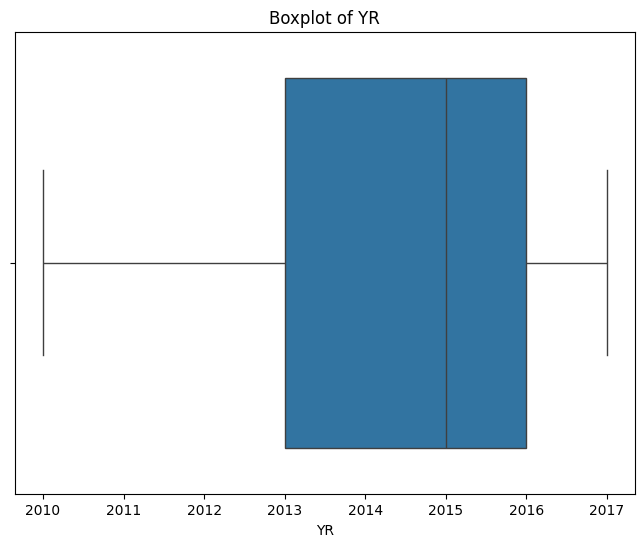

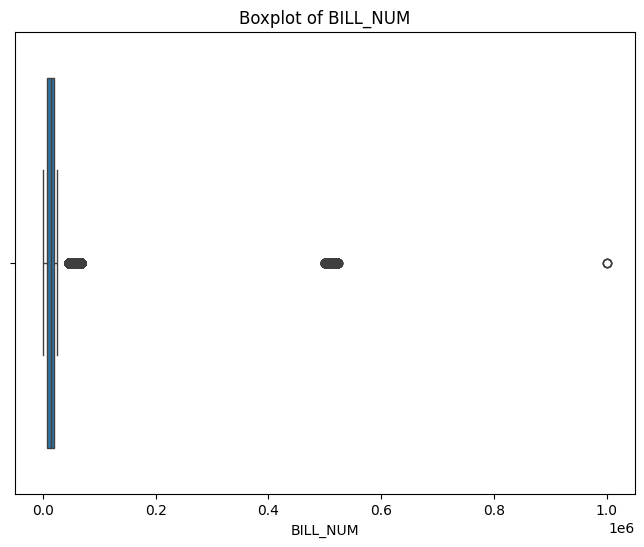

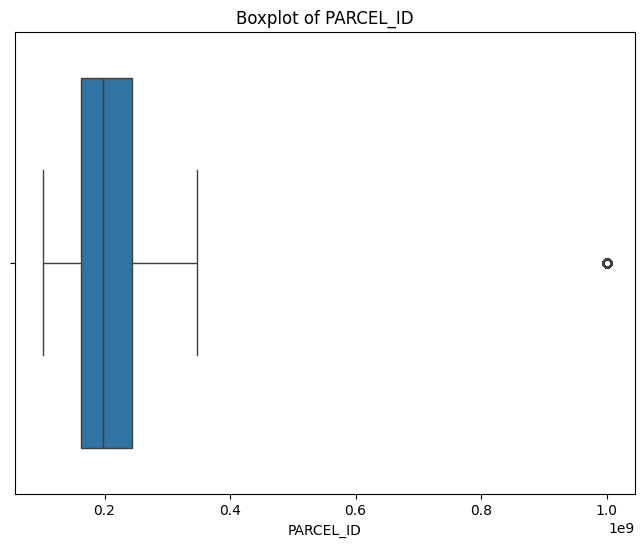

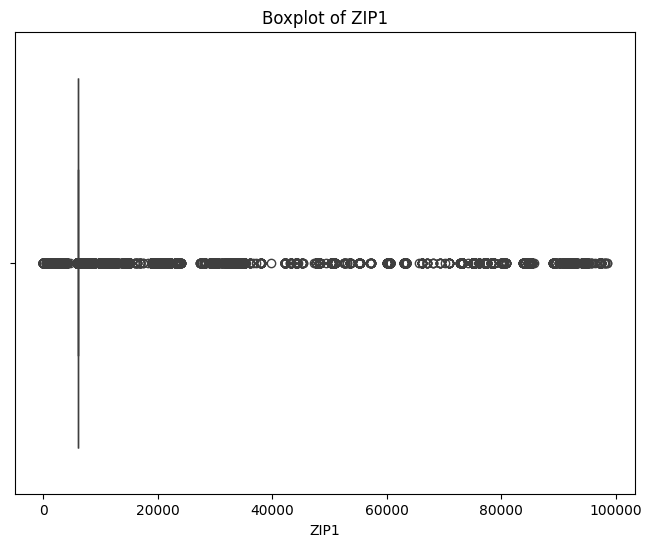

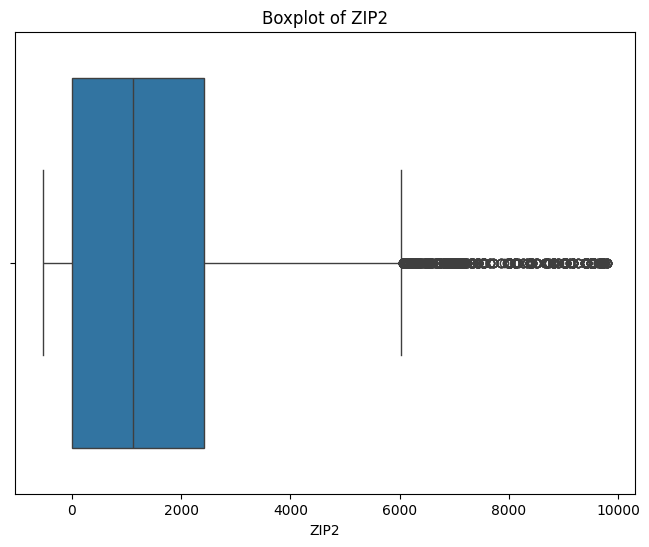

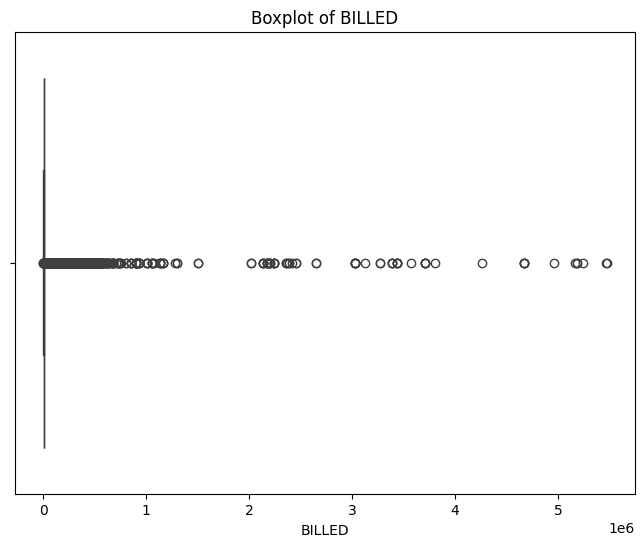

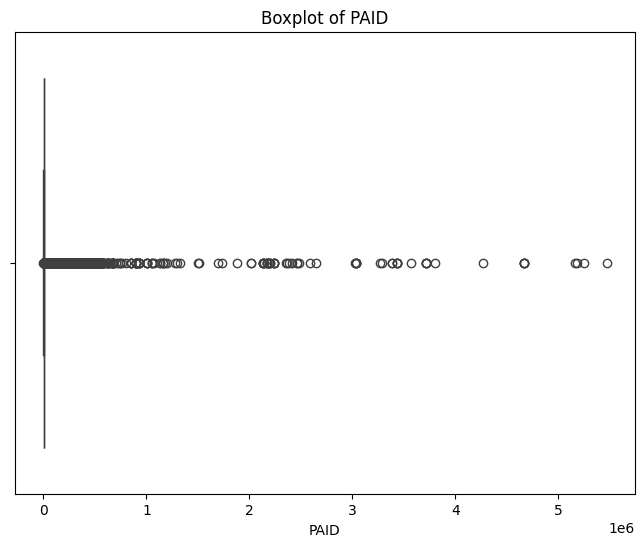

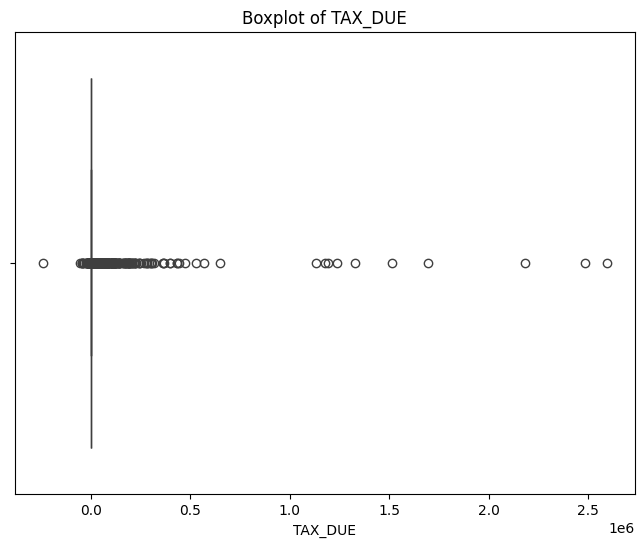

In [20]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

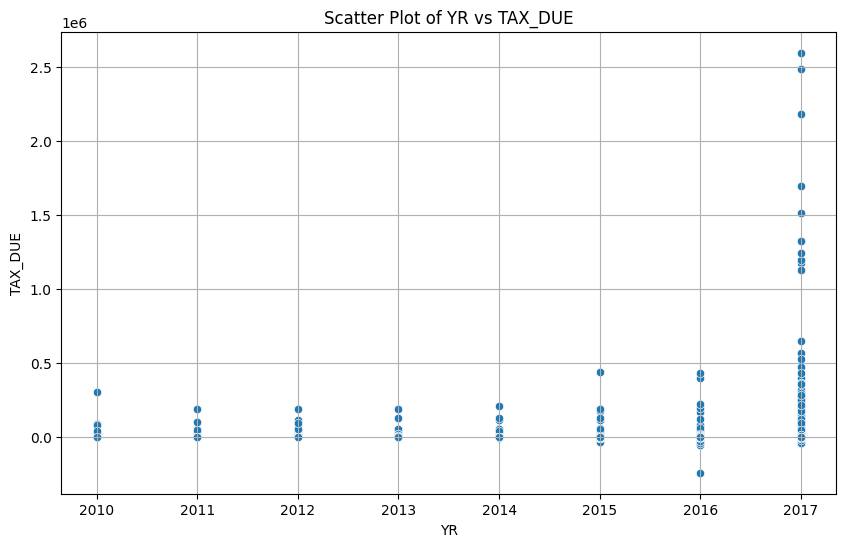

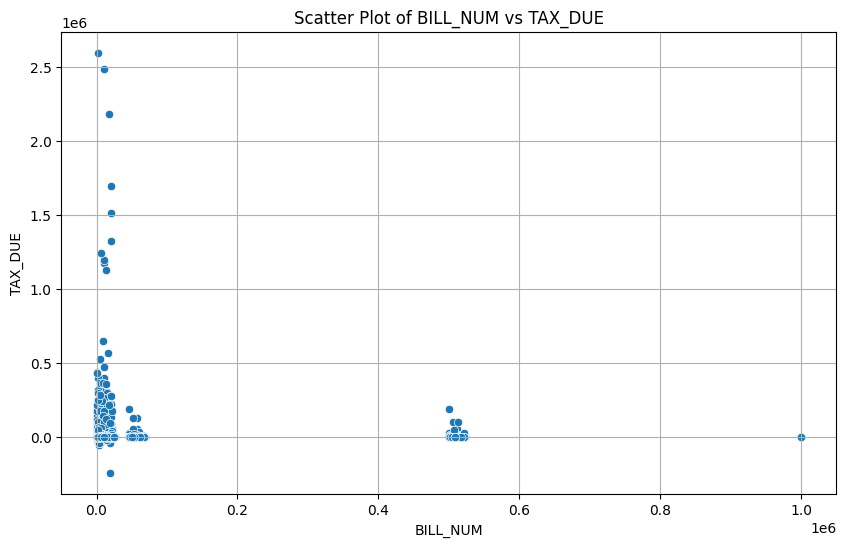

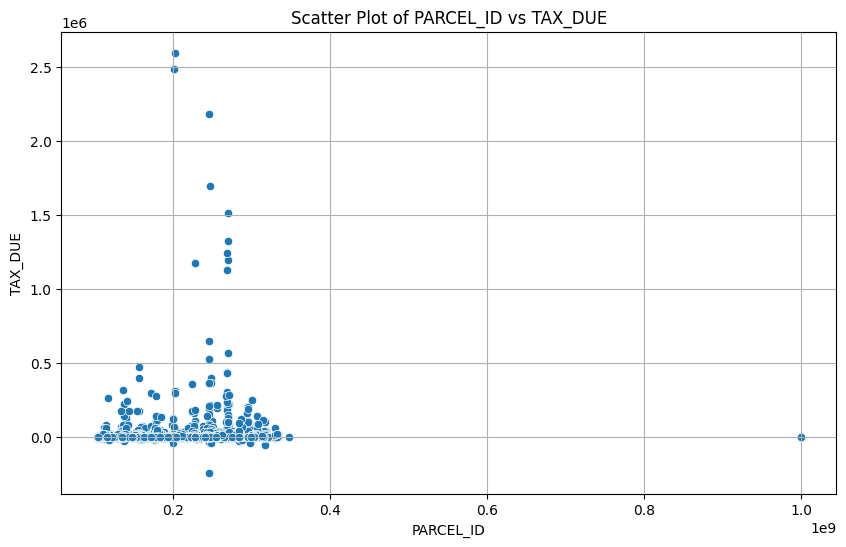

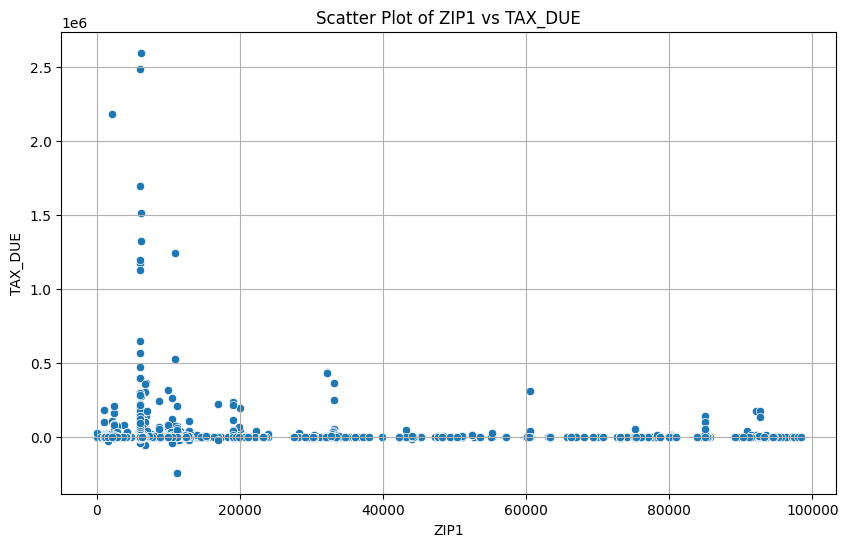

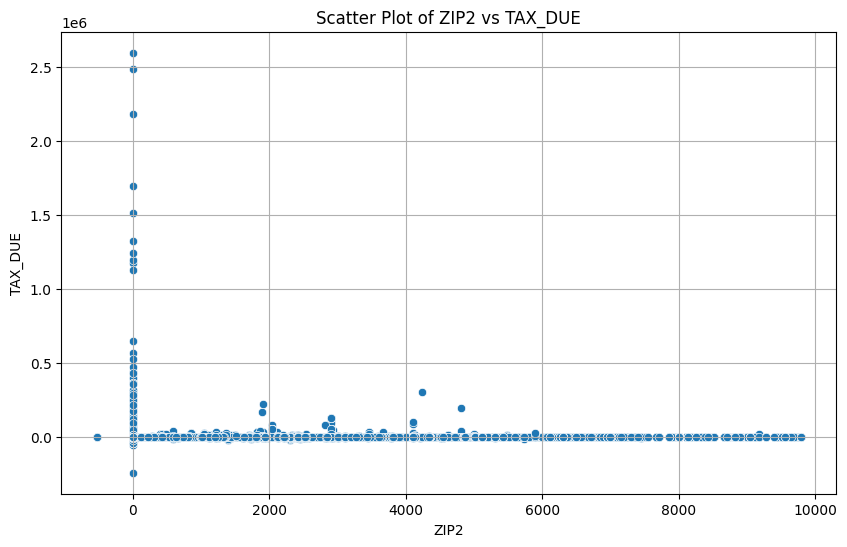

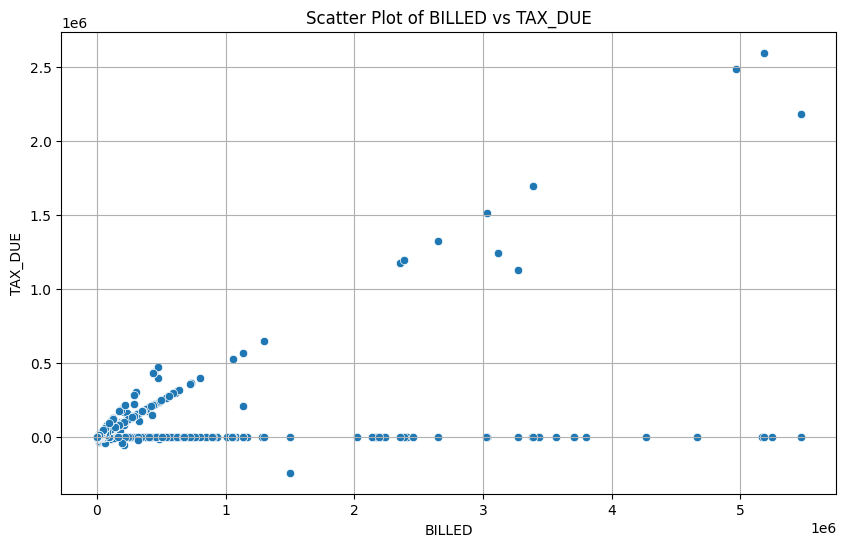

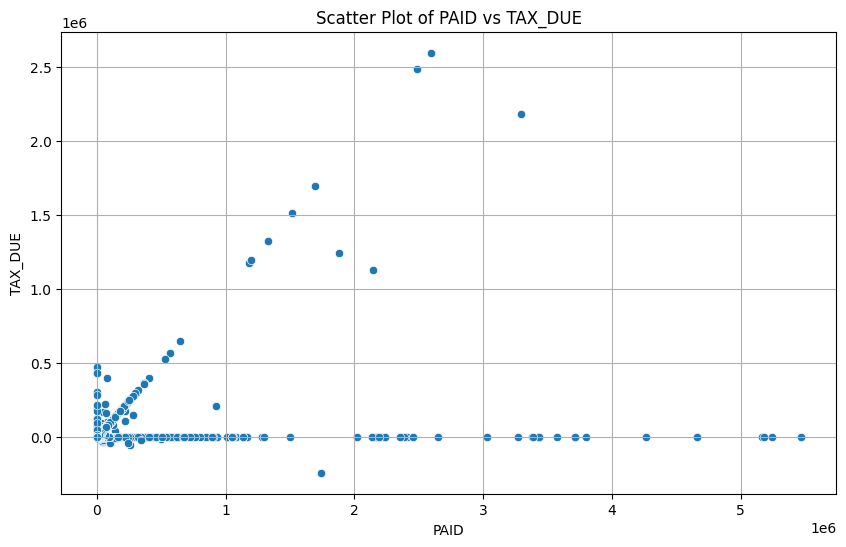

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns from the DataFrame
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Loop through each numerical column and create scatter plots against 'TAX_DUE'
for col in num_cols:
    if col != 'TAX_DUE':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=col, y='TAX_DUE', data=df)
        plt.title(f'Scatter Plot of {col} vs TAX_DUE')
        plt.xlabel(col)
        plt.ylabel('TAX_DUE')
        plt.grid(True)
        plt.show()

### Skewness and Kurtosis

In [22]:
from scipy.stats import skew, kurtosis

#claculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurt = df[num_cols].apply(lambda x: kurtosis(x,fisher=False))

print(skewness)
print(kurt)

#Identify positive and negative skewness (absolute value>1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('variable with positive skewness (skew > 1):\n', positive_skewness)
print('variable with negative skewness (skew < -1):\n', negative_skewness)

# Identify the platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

YR            -0.109095
BILL_NUM      10.374518
PARCEL_ID      3.837283
ZIP1           7.743395
ZIP2           1.018305
BILLED        43.866513
PAID          44.622972
TAX_DUE      104.879384
dtype: float64
YR               1.873613
BILL_NUM       138.391182
PARCEL_ID       56.904924
ZIP1            67.557507
ZIP2             3.953684
BILLED        2330.953121
PAID          2438.336953
TAX_DUE      13516.229573
dtype: float64
variable with positive skewness (skew > 1):
 BILL_NUM      10.374518
PARCEL_ID      3.837283
ZIP1           7.743395
ZIP2           1.018305
BILLED        43.866513
PAID          44.622972
TAX_DUE      104.879384
dtype: float64
variable with negative skewness (skew < -1):
 Series([], dtype: float64)
variables with platykurtic distribution (kurtosis < 3):
 YR    1.873613
dtype: float64
variables with leptokurtic distribution (kurtosis > 3):
 BILL_NUM       138.391182
PARCEL_ID       56.904924
ZIP1            67.557507
ZIP2             3.953684
BILLED        2330.95

#### The target variable'TAX_DUE' is almost constant (i.e., most values are '0'), skewness and kurtosis might result in NaN or very high values

### Skewness:

 * Positive Skewness: 'BILL_NUM','PARCEL_ID','ZIP1','ZIP2','BILLED','PAID','TAX_DUE' have positive skewness, indicating a longer right tail.
 * Negative Skewness: None of the variables have significant negative skewness. tail.

### Kurtosis:

* Platykurtic Distribution:variable 'YR' have a flatter distribution (kurtosis < 3).
* Leptokurtic Distribution: 'BILL_NUM','PARCEL_ID','ZIP1','ZIP2','BILLED','PAID','TAX_DUE' have a sharper peak and heavier tails (kurtosis > 3). > 3).

### Implications for Model Building:

* Positive Skewness: 'BILL_NUM','PARCEL_ID','ZIP1','ZIP2','BILLED','PAID','TAX_DUE'  may need transformation to reduce skewness for better model performance.
* Platykurtic Variables: variable 'YR' have flatter distribution, indicating outlier influence.
* Leptokurtic Variables:'BILL_NUM','PARCEL_ID','ZIP1','ZIP2','BILLED','PAID','TAX_DUE' have sharper peaks and heavier tails, which may affect model sensitivity to  outliers.

### Correlation

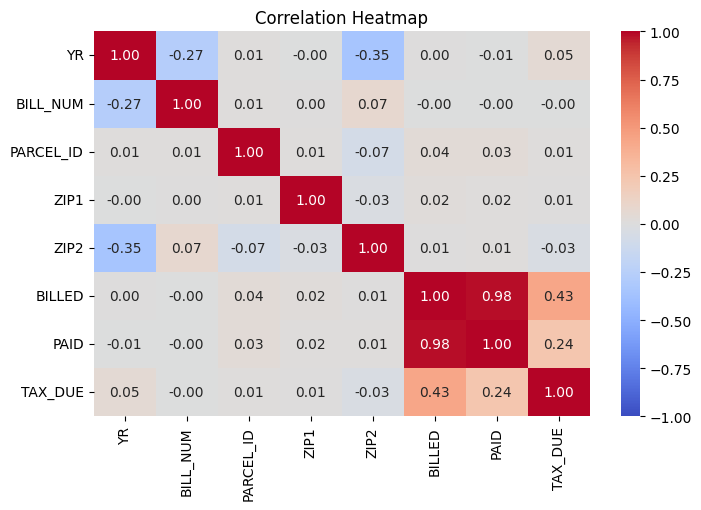

In [23]:
# Correlation heatmap
# Assuming df is our DataFrame as provided
# Drop non-numeric columns before computing correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### insights:The heatmap provides a visual representation of the correlations between different numerical features in my dataset. Here are some key insights:

### 1.Positive Correlation with TAX_DUE:

* BILLED(0.43),PAID(0.24): These are the 2 columns that positively correlate with TAX_DUE

### 2.Multicollinearity:

* PAID and BILLED(0.98): These two features are highly correlated, suggesting multicollinearity.
* Drop Recommendation:Given the high correlation (0.98) between PAID and BILLED,I can drop both features to reduce multicollinearity.

### Analysing Categorical columns

In [24]:
for col in cat_cols:
    print(f"Values in {col}:\n{df[col].unique()}")
    print(f"Number of unique values in {col}: {df[col].nunique()}\n")

Values in BILL_TYPE:
['Residential']
Number of unique values in BILL_TYPE: 1

Values in TXPR_NAME:
['LYTTLETON PRISCILLA' 'CZARNECKI EUGENE B'
 'SOUTHERN NEW ENGLAND CONFERENC' ... 'FRANKLIN GARDENS' 'SOUTH PLACE'
 'LAUREL ST CONDOS']
Number of unique values in TXPR_NAME: 22180

Values in CO_NAME:
['LYTTLETON KEITHTOUS' nan 'HAYNES EUGENE JR ESTATE' ...
 'C/O CAPSTONE MGMT' 'C/O ADVANCE PROPERTY MANAGEMEN' 'C/O JOHN F LEE']
Number of unique values in CO_NAME: 6791

Values in MAIL_ADDR:
['297 BELLEVUE ST' '809 NEW BRITAIN AV' 'PO Box 269' ... '145 GEORGE ST'
 '362 LAUREL ST' 'PROPERTY SERVICES INC']
Number of unique values in MAIL_ADDR: 20052

Values in MAIL_ADDR2:
[nan 'C/O VESPASIAN  LLC' '95 NILES STREET' 'DBA HAVANA GROUP'
 '7 CLEVELAND AV UNIT 0102' 'Apt.G-1' '433 SO MAIN ST SUITE 328'
 'AIMCO/TTA MS 235' 'PO BOX 53' '101 N. TRYON STREET' 'C/O CAPSTONE MGMT.'
 'c/o ZGS COMMUNICATIONS' 'APT 2132' 'C/O ORL PROPERTY MANAGEMENT'
 'c/o American Home Mortgage Ser' 'C/O SUMMIT MEDICAL'
 '

### cross tabulation TAX_DUE across the STATE column

In [25]:
pd.crosstab(["TAX_DUE"],df["STATE"],margins=True)

STATE,AL,AP,AR,AZ,CA,CN,CO,CT,DC,DE,...,UK,US,UT,VA,VI,WA,WI,ct,ny,All
row_0,,,,,,,,,,,,,,,,,,,,,
TAX_DUE,28,1,7,102,392,14,103,122033,27,36,...,6,1,43,144,3,6,27,2,1,136010
All,28,1,7,102,392,14,103,122033,27,36,...,6,1,43,144,3,6,27,2,1,136010


* #### The dataset contains records for 56 unique states or regions.
* #### The All row gives the total count of records for each state (which is identical to the counts in the TAX_DUE row, implying that every record in the dataset has taxes due).
* #### For example:
#### AL (Alabama): 28 records, all with taxes due.
#### CT (Connecticut): 122,033 records, all with taxes due.
#### CA (California): 392 records, all with taxes due.
#### Other states like UK, US, VI, etc., also have smaller counts.
#### The final column ('All') shows a total of 136,010 records, and all of them have taxes due.

## 6. Data Preprocessing

##### dropping rows in which target variable is 0 that may harm the quality of your analysis or model performance.

In [26]:
import pandas as pd

# Assuming df is your DataFrame
# Step 1: Filter the rows where 'TAX_DUE' is 0
tax_due_zero = df[df['TAX_DUE'] == 0]

# Step 2: Randomly sample rows where 'TAX_DUE' is 0
sampled_tax_due_zero = tax_due_zero.sample(frac=0.9, random_state=42)

# Step 3: Drop the sampled rows from the original DataFrame
df2 = df.drop(sampled_tax_due_zero.index)

In [27]:
#this code creates a copy of the orginal dataframe"df" & assigns it to a new variable "df1" for the further purpose.
df1 = df2.copy()
df1.shape

(31290, 18)

In [28]:
df1.columns

Index(['YR', 'BILL_TYPE', 'BILL_NUM', 'PARCEL_ID', 'TXPR_NAME', 'CO_NAME',
       'MAIL_ADDR', 'MAIL_ADDR2', 'CITY', 'STATE', 'ZIP1', 'ZIP2',
       'PROP_LOC_NUM', 'PROP_LOC_NAME', 'LIEN_SOLD', 'BILLED', 'PAID',
       'TAX_DUE'],
      dtype='object')

#### The columns "CO_NAME","MAIL_ADDR2", "LIEN_SOLD" contain almost missing values, so that those can be droped from the dataset.

In [29]:
# Drop the specified columns
df1.drop(['CO_NAME','MAIL_ADDR2','LIEN_SOLD'],axis=1,inplace=True)

### Remove unnecessary columns:


In [30]:
# column with multicollinearity
# Drop 'PAID' column
df1.drop(columns=['PAID'], inplace=True)

### Handling missing values

In [31]:
#Fill missing categorical values with the column's mode
df1.fillna(df1.mode().iloc[0], inplace=True)

In [32]:
# removing rows with nullvalues in target column
#The subset parameter specifies that the operation should consider only the specified columns when dropping rows.
df1.dropna(subset=['TAX_DUE'],inplace=True) 
df1.shape

(31290, 14)

In [33]:
df1.to_csv('cleaned_residential_property_tax.csv', index=False)

In [34]:
import pandas as pd
from sklearn.impute import KNNImputer
from scipy import stats
import numpy as np
# Handle missing values in TAX_DUE
# Option 1: Remove rows with NaN values
# df = df.dropna(subset=['TAX_DUE'])
# Option 2: Impute NaN values with the mean
# mean_tax_due = df['TAX_DUE'].mean()
# df['TAX_DUE'].fillna(mean_tax_due, inplace=True)
# Option 3: Impute NaN values with KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df1[['TAX_DUE']] = imputer.fit_transform(df1[['TAX_DUE']])
# Verify imputation
nan_count_after = df1['TAX_DUE'].isna().sum()
print(f'Total NaN values in TAX_DUE after imputation: {nan_count_after}')
# Outlier treatment for TAX_DUE column using Z-score
z_scores = np.abs(stats.zscore(df1['TAX_DUE']))
threshold = 3
outliers = np.where(z_scores > threshold)
# Remove outliers
df1 = df1[(z_scores <= threshold)]
# Optionally, print the number of removed outliers
print(f'Removed {len(outliers[0])} outliers from TAX_DUE column')

Total NaN values in TAX_DUE after imputation: 0
Removed 92 outliers from TAX_DUE column


In [35]:
# finding missing /null values
df1.isnull().sum()

YR               0
BILL_TYPE        0
BILL_NUM         0
PARCEL_ID        0
TXPR_NAME        0
MAIL_ADDR        0
CITY             0
STATE            0
ZIP1             0
ZIP2             0
PROP_LOC_NUM     0
PROP_LOC_NAME    0
BILLED           0
TAX_DUE          0
dtype: int64

### Handling Outliers

#### Here IQR method is used for outlier treatement

In [36]:
# IQR method for outlier detection in 'TAX_DUE'
Q1 = df['TAX_DUE'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['TAX_DUE'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                      # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'TAX_DUE'
outliers_iqr = df[(df['TAX_DUE'] < lower_bound) | (df['TAX_DUE'] > upper_bound)]

# Print outliers in 'TAX_DUE'
print(outliers_iqr)

          YR    BILL_TYPE  BILL_NUM  PARCEL_ID                   TXPR_NAME  \
0       2010  Residential     12351  264169027         LYTTLETON PRISCILLA   
3       2010  Residential      2671  284074072             BROWN DERMOTH H   
10      2010  Residential     20736  170029174               TURNER JOHN G   
11      2010  Residential     15616  240119104                  PEAY NAOMI   
15      2010  Residential     13822  219211011  MIDDLEFIELD PROPERTIES LLC   
...      ...          ...       ...        ...                         ...   
136039  2017  Residential      6958  171094057             DAVIS DEBORAH C   
136040  2017  Residential     25380  227544074   WASHINGTON DEVELOPERS LLC   
136041  2017  Residential     16312  147018080         CASTLEROCK 2017 LLC   
136042  2017  Residential     11083  193055038        IRVING VIOLET LOUISE   
136044  2017  Residential     25486  227544084   WASHINGTON DEVELOPERS LLC   

                    CO_NAME                       MAIL_ADDR    

In [37]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    return lw,uw

In [38]:
lw, uw = whisker(df1['BILLED'])
print(f'Lower whisker: {lw}, Upper whisker:{uw}')

Lower whisker: -3069.3725, Upper whisker:9065.6875


#### Since the lower whisker is negative (and the column 'BILLED' represent payment, which is usually positive), the lower whisker doesn’t make much practical sense for this type of data. It suggests there are no meaningful lower outliers.

In [39]:
for i in df1.select_dtypes(include = 'number').columns:
    lw,uw = whisker(df1[i])
    df1[i] = np.where(df1[i] < lw,lw,df1[i])
    df1[i] = np.where(df1[i] > uw,uw,df1[i])

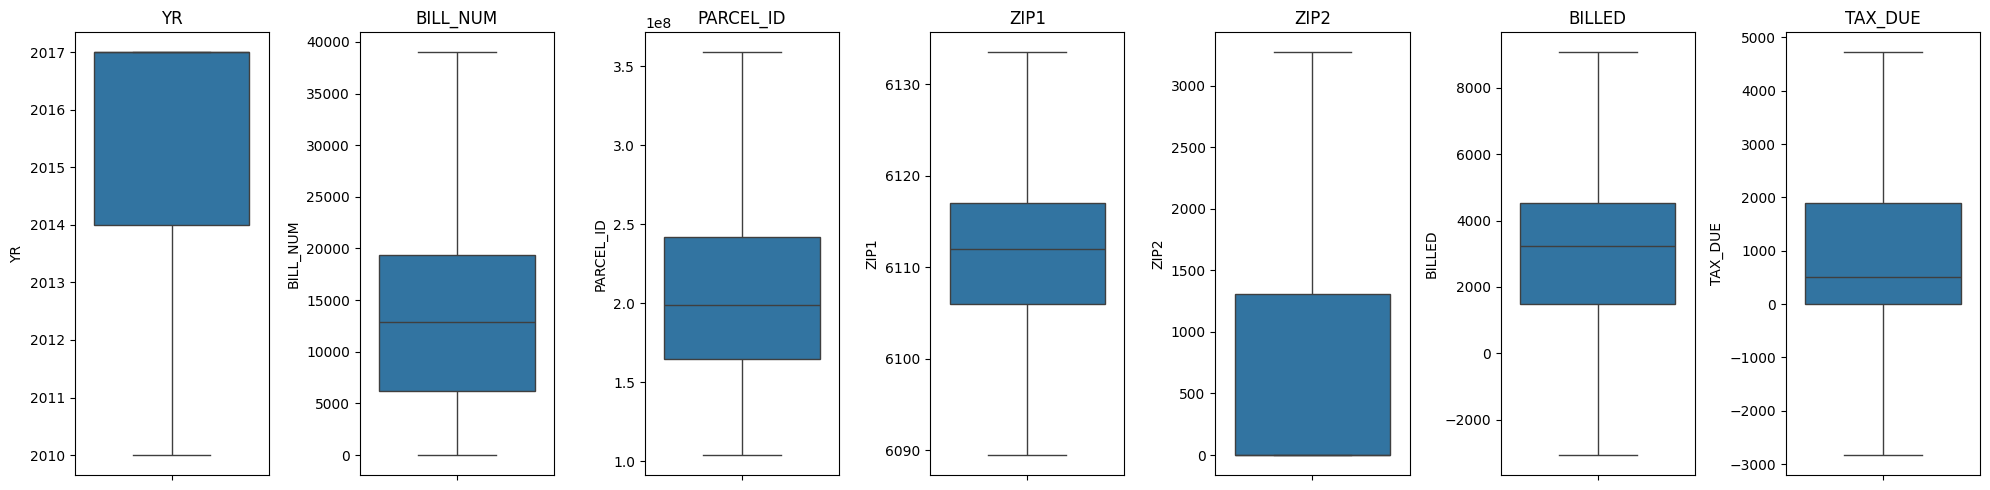

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))  # Adjust the figure size as needed
numeric_columns = df1.select_dtypes(include='number').columns

for i, col in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i + 1)  # Adjust subplot arrangement dynamically
    sns.boxplot(y=df1[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### All Outliers are removed

## Check the skewness and kurtosis after outlier treatment

In [41]:
from scipy.stats import skew, kurtosis

#claculate skewness and kurtosis
skewness = df1[numeric_columns].apply(skew)
kurt = df1[numeric_columns].apply(lambda x: kurtosis(x, fisher=False))

print(skewness)
print(kurt)

#Identify positive and negative skewness (absolute value>1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('variable with positive skewness (skew > 1):\n', positive_skewness)
print('variable with negative skewness (skew < -1):\n', negative_skewness)
print("====================================================================================")

# Identify the platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)
print("====================================================================================")

YR          -1.110871
BILL_NUM     0.968345
PARCEL_ID    0.061675
ZIP1         0.299804
ZIP2         1.328131
BILLED       0.876689
TAX_DUE      1.114778
dtype: float64
YR           2.989293
BILL_NUM     3.614933
PARCEL_ID    2.161545
ZIP1         2.781261
ZIP2         3.173185
BILLED       2.896980
TAX_DUE      3.539438
dtype: float64
variable with positive skewness (skew > 1):
 ZIP2       1.328131
TAX_DUE    1.114778
dtype: float64
variable with negative skewness (skew < -1):
 YR   -1.110871
dtype: float64
variables with platykurtic distribution (kurtosis < 3):
 YR           2.989293
PARCEL_ID    2.161545
ZIP1         2.781261
BILLED       2.896980
dtype: float64
variables with leptokurtic distribution (kurtosis > 3):
 BILL_NUM    3.614933
ZIP2        3.173185
TAX_DUE     3.539438
dtype: float64


## 7. Visualization

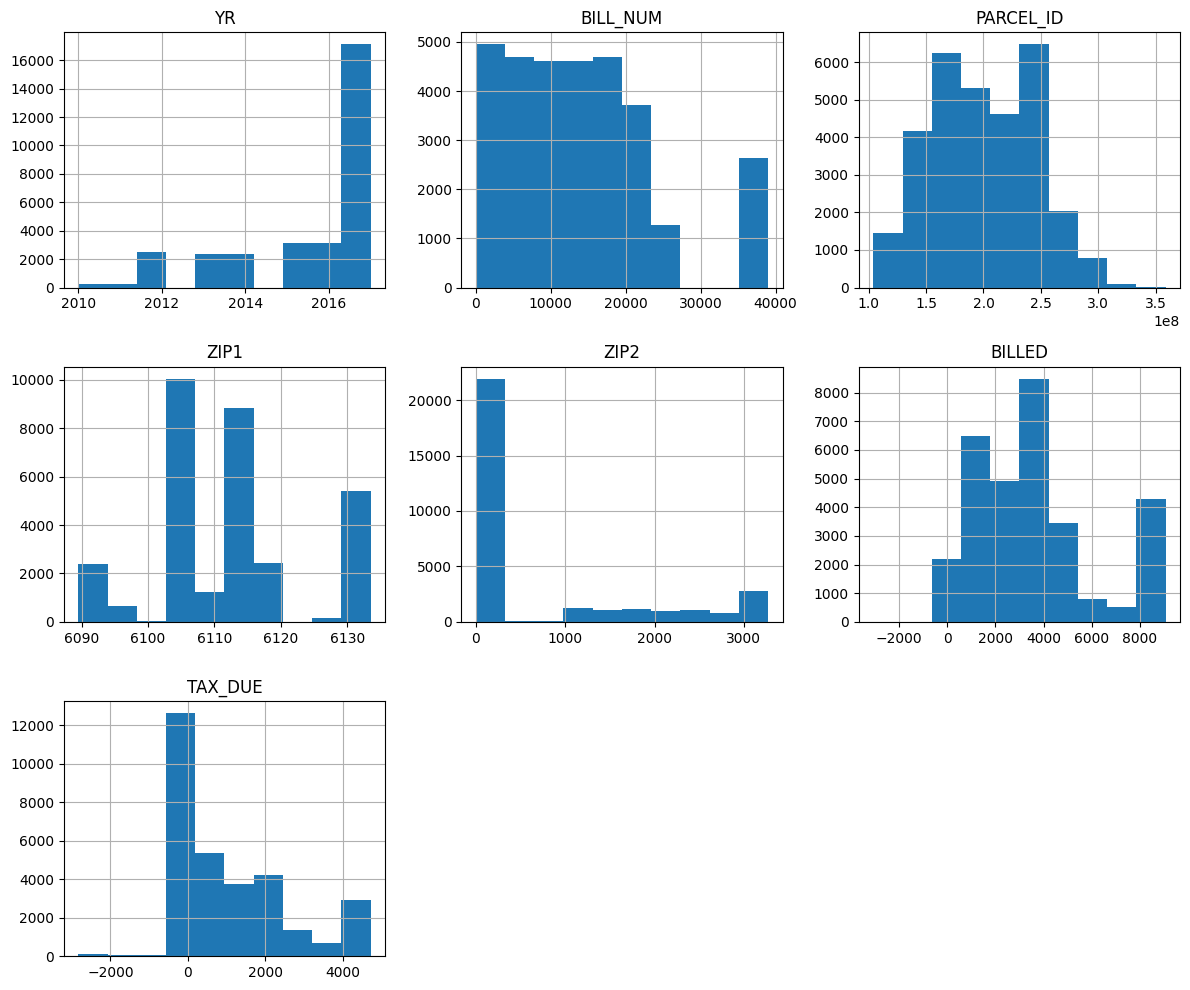

In [42]:
# Histograms for numerical columns after outlier treatment
# Histograms and Distribution Plots
df1.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

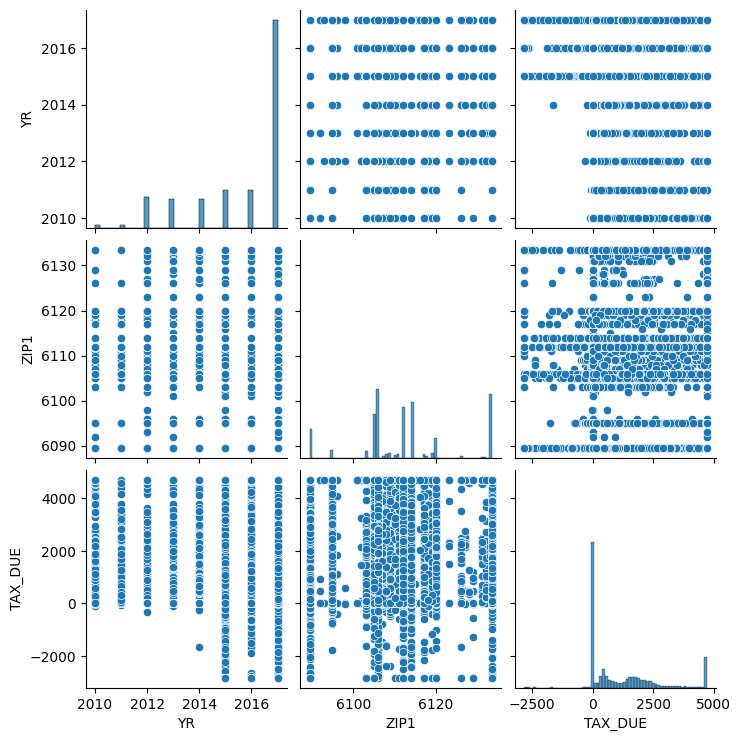

In [43]:
# Scatter Plots
sns.pairplot(df1, vars=['YR','ZIP1','TAX_DUE'])
plt.show()

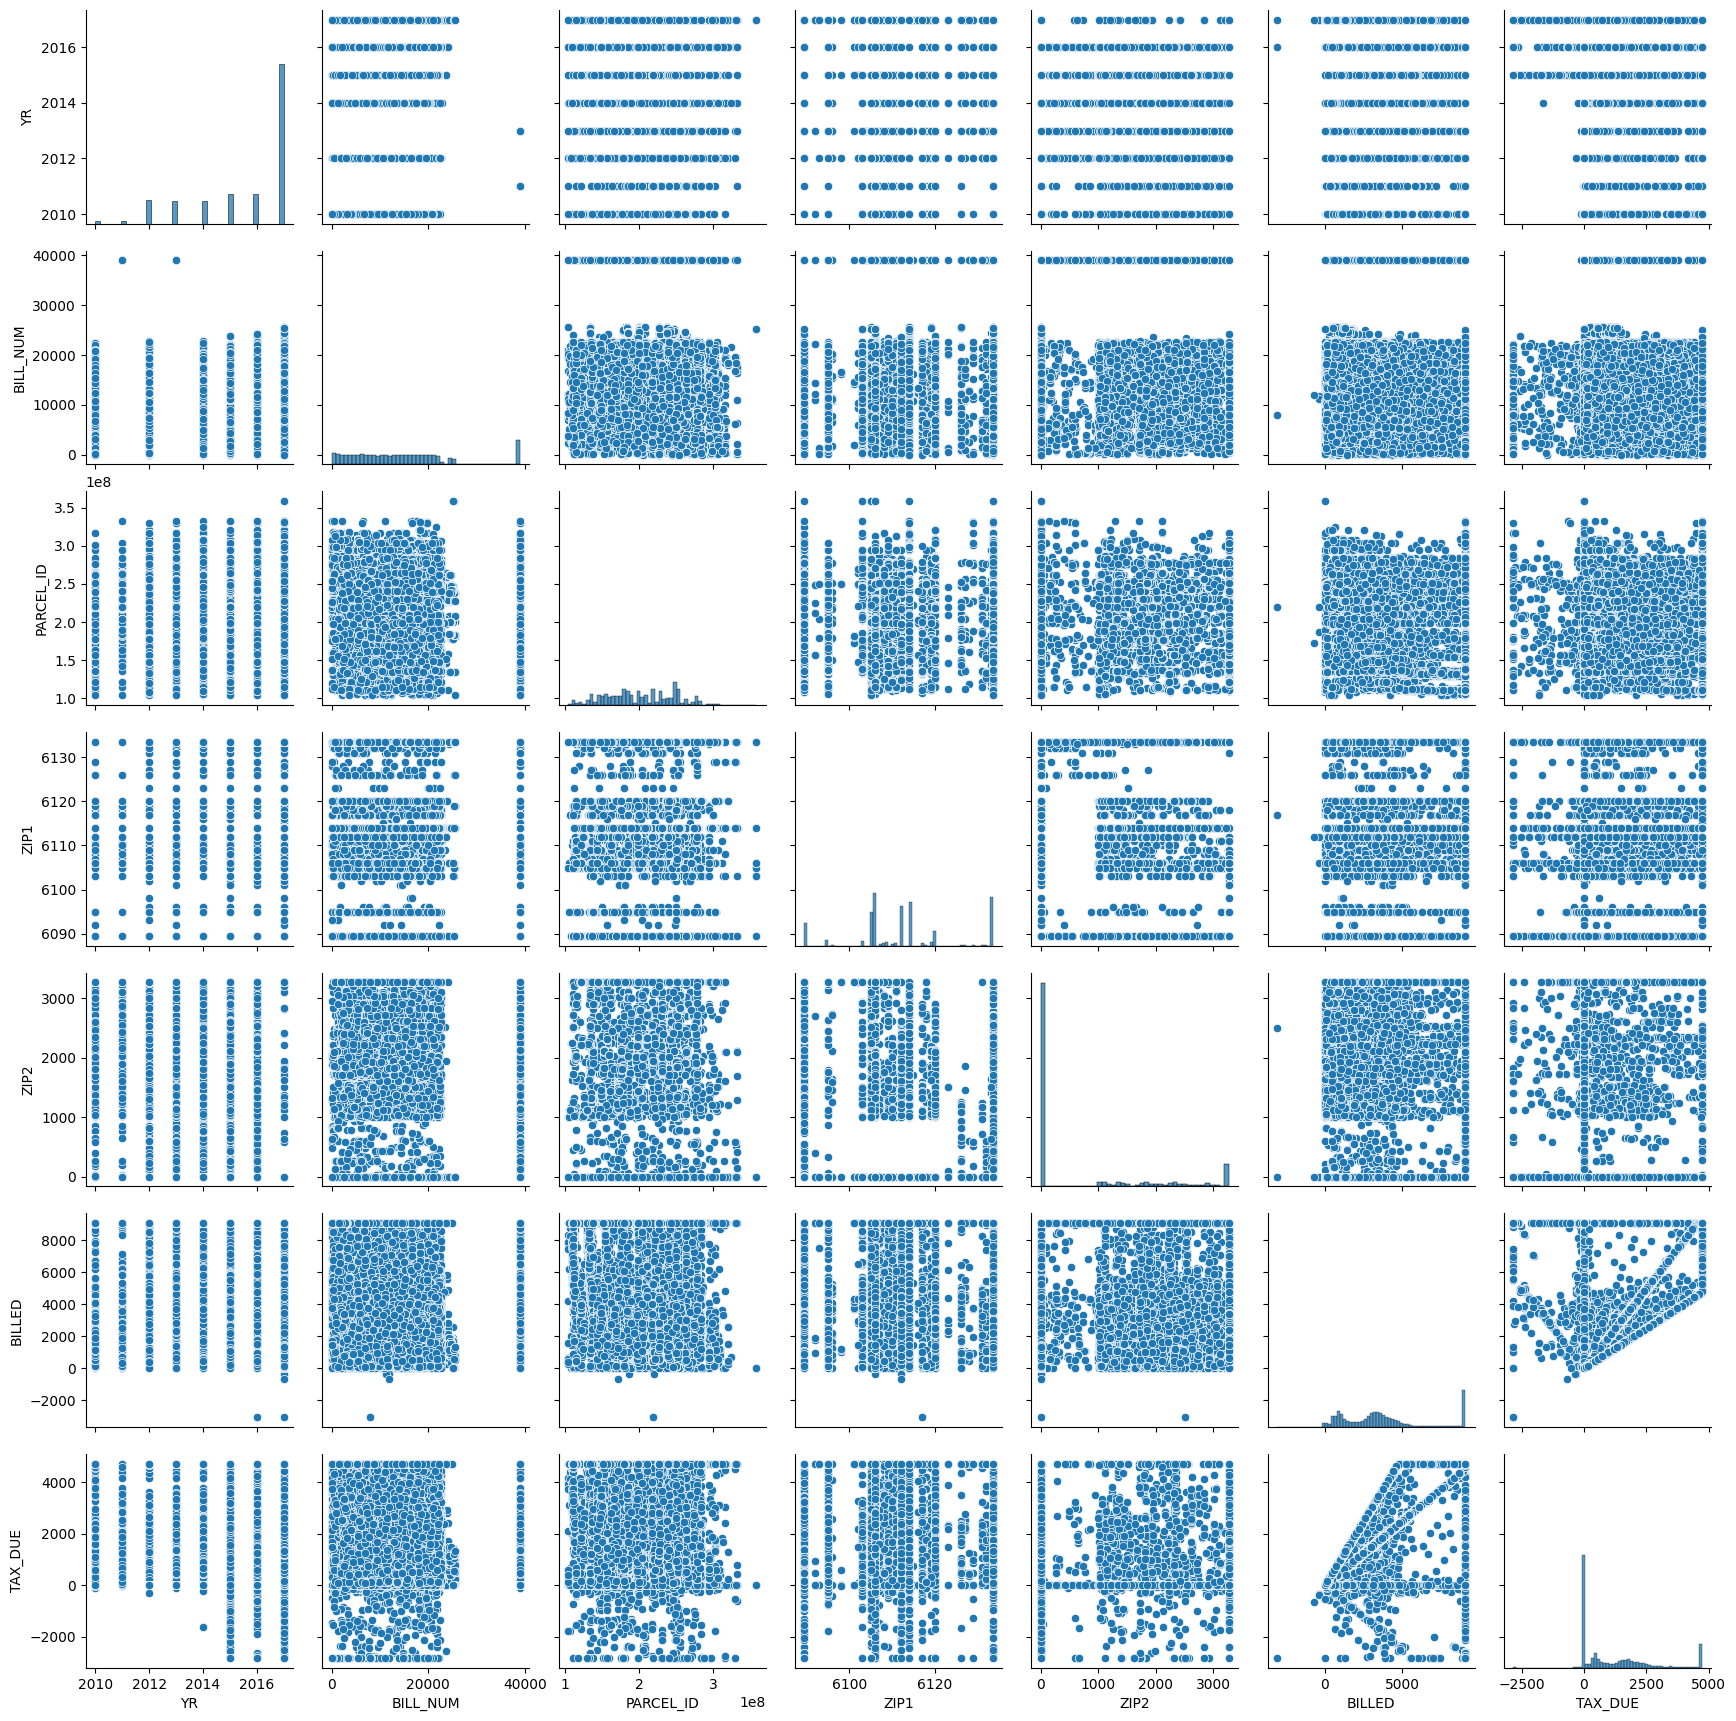

In [44]:
# pairplot - To visualize relationship between multiple pairs of variables
sns.pairplot(df1)

* The diagonal represents histograms of individual variables, showing their distribution.
* YR (year) variable shows a high concentration around 2016, with a sharp peak.
* The triangular pattern, indicating that higher values of BILLED correspond to higher values of TAX_DUE.
* Many of the scatter plots are dense, because of discrete values or categorical data in the dataset.

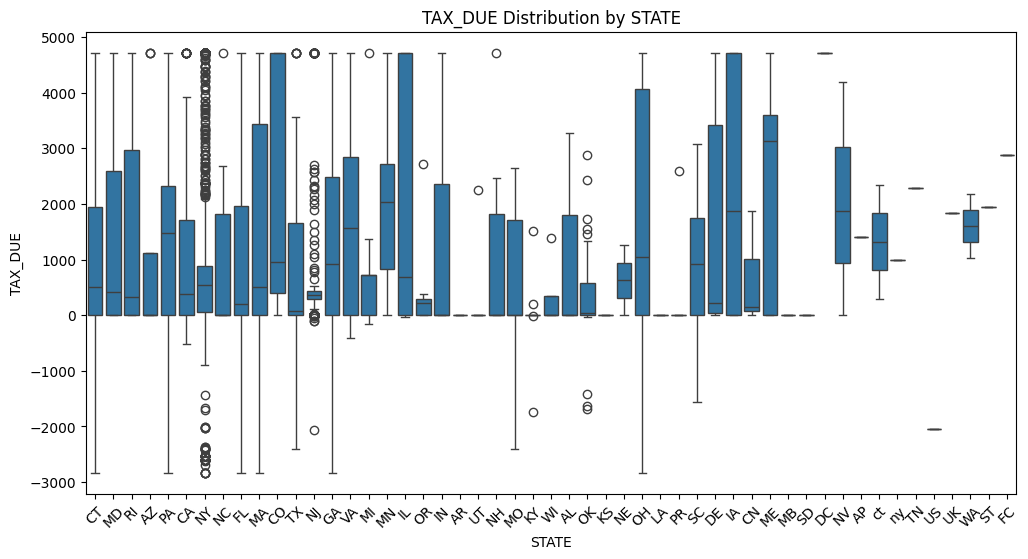

In [45]:
# Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE', y='TAX_DUE', data=df1)
plt.xticks(rotation=45)
plt.title('TAX_DUE Distribution by STATE')
plt.show()

* This visualization highlights the variation in tax dues across different states.
* states are listed in an abbreviated form (e.g., CT, MD, AZ, PA, etc.).
* There are several states with a wide range of TAX_DUE values, such as CA, FL, and IA, with multiple outliers.
* Some states show negative tax dues, indicating instances where people received refunds or had no tax due, such as GA and MO.
* Certain states have more centralized distributions, indicating less variation in TAX_DUE, such as NJ and NH.

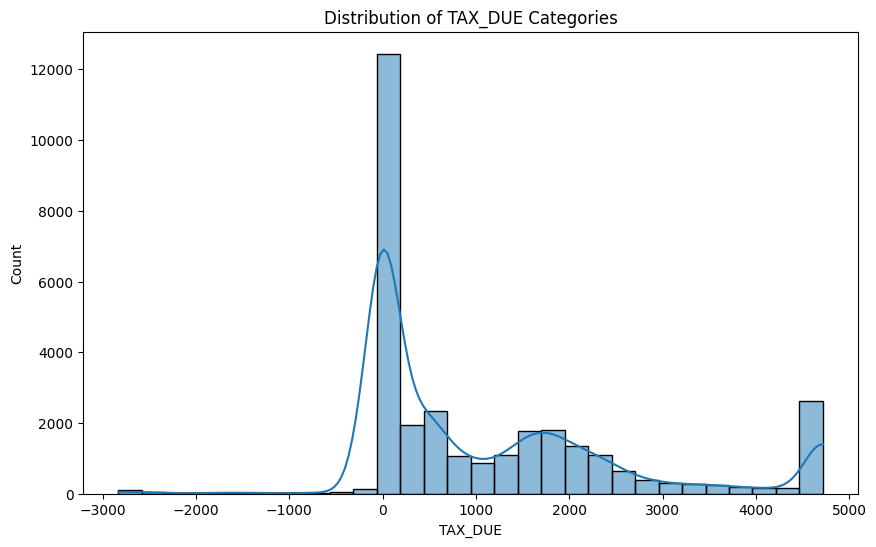

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df1['TAX_DUE'], bins=30, kde=True)
plt.title('Distribution of TAX_DUE Categories')
plt.xlabel('TAX_DUE')
plt.ylabel('Count')
plt.show()

* values like 1000, 2000, and 3000, representing smaller groups of taxpayers with moderate dues.
* a small number of isolated points at much higher values, such as 4000 and beyond, indicating the relatively rare instances of significantly higher      tax dues.

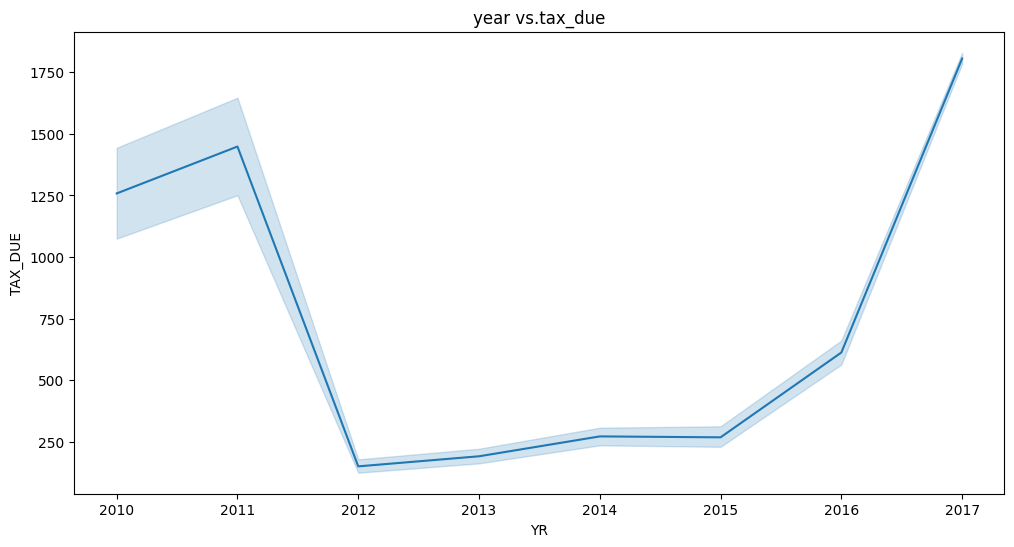

In [47]:
# Line Plots (for time-series data, if applicable)
plt.figure(figsize=(12, 6))
sns.lineplot(x='YR', y='TAX_DUE', data=df1)
plt.title('year vs.tax_due')
plt.show()

<Axes: >

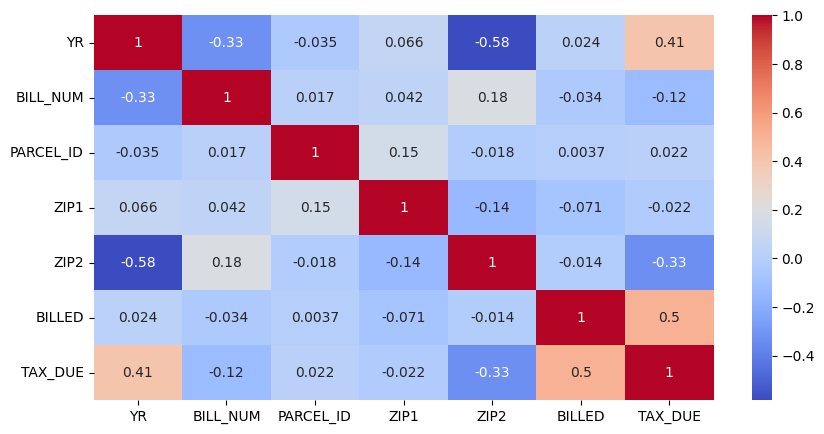

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(df1[numeric_columns].corr(),annot=True, cmap = 'coolwarm')

## 8. Feature Engineering

#### Encode categorical features to numerical using techniques like one-hot encoding or label encoding to prepare thedata for machine learning algorithms. Use Label encoding for ordinal data and one-hot encoding for nominal data.

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31198 entries, 0 to 136044
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YR             31198 non-null  float64
 1   BILL_TYPE      31198 non-null  object 
 2   BILL_NUM       31198 non-null  float64
 3   PARCEL_ID      31198 non-null  float64
 4   TXPR_NAME      31198 non-null  object 
 5   MAIL_ADDR      31198 non-null  object 
 6   CITY           31198 non-null  object 
 7   STATE          31198 non-null  object 
 8   ZIP1           31198 non-null  float64
 9   ZIP2           31198 non-null  float64
 10  PROP_LOC_NUM   31198 non-null  object 
 11  PROP_LOC_NAME  31198 non-null  object 
 12  BILLED         31198 non-null  float64
 13  TAX_DUE        31198 non-null  float64
dtypes: float64(7), object(7)
memory usage: 3.6+ MB


In [50]:
df1.shape

(31198, 14)

In [51]:
# Perform one-hot encoding on the feature columns
#drop_first=True: This parameter is set to True to drop the first level for each categorical variable after one-hot encoding. 
df1 = pd.get_dummies(df1, columns=['BILL_TYPE','TXPR_NAME','MAIL_ADDR','CITY','STATE','PROP_LOC_NUM','PROP_LOC_NAME',], drop_first=True)
df1.head()

,YR,BILL_NUM,PARCEL_ID,ZIP1,ZIP2,BILLED,TAX_DUE,TXPR_NAME_10-50 ALBANY AVENUE LLC,TXPR_NAME_100 EAST MAIN STREET LLC,TXPR_NAME_100 LINCOLN STREET LLC,...,PROP_LOC_NAME_WOODLAND ST 33,PROP_LOC_NAME_WOODLAND ST 41,PROP_LOC_NAME_WOODSIDE CIR,PROP_LOC_NAME_WOODSTOCK ST,PROP_LOC_NAME_WOOSTER ST,PROP_LOC_NAME_WYLLYS ST,PROP_LOC_NAME_YALE ST,PROP_LOC_NAME_YORK ST,PROP_LOC_NAME_ZION ST,PROP_LOC_NAME_ZION ST 0003
0,2010.0,12351.0,264169027.0,6120.0,2104.0,891.34,829.16,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2010.0,2671.0,284074072.0,6120.0,1109.0,2373.16,456.76,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,2010.0,20736.0,170029174.0,6112.0,1206.0,1107.44,687.36,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,2010.0,15616.0,240119104.0,6120.0,1810.0,550.56,9.88,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,2010.0,13822.0,219211011.0,6105.0,0.0,2799.58,56.41,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
x = df1.drop('TAX_DUE', axis = 1)
y = df1['TAX_DUE']

x.head()

,YR,BILL_NUM,PARCEL_ID,ZIP1,ZIP2,BILLED,TXPR_NAME_10-50 ALBANY AVENUE LLC,TXPR_NAME_100 EAST MAIN STREET LLC,TXPR_NAME_100 LINCOLN STREET LLC,TXPR_NAME_100 PEARL STREET LLC,...,PROP_LOC_NAME_WOODLAND ST 33,PROP_LOC_NAME_WOODLAND ST 41,PROP_LOC_NAME_WOODSIDE CIR,PROP_LOC_NAME_WOODSTOCK ST,PROP_LOC_NAME_WOOSTER ST,PROP_LOC_NAME_WYLLYS ST,PROP_LOC_NAME_YALE ST,PROP_LOC_NAME_YORK ST,PROP_LOC_NAME_ZION ST,PROP_LOC_NAME_ZION ST 0003
0,2010.0,12351.0,264169027.0,6120.0,2104.0,891.34,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2010.0,2671.0,284074072.0,6120.0,1109.0,2373.16,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,2010.0,20736.0,170029174.0,6112.0,1206.0,1107.44,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,2010.0,15616.0,240119104.0,6120.0,1810.0,550.56,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,2010.0,13822.0,219211011.0,6105.0,0.0,2799.58,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
x.shape

(31198, 31927)

In [54]:
y.shape

(31198,)

In [55]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# Convert the result back to a DataFrame
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,YR,BILL_NUM,PARCEL_ID,ZIP1,ZIP2,BILLED,TXPR_NAME_10-50 ALBANY AVENUE LLC,TXPR_NAME_100 EAST MAIN STREET LLC,TXPR_NAME_100 LINCOLN STREET LLC,TXPR_NAME_100 PEARL STREET LLC,...,PROP_LOC_NAME_WOODLAND ST 33,PROP_LOC_NAME_WOODLAND ST 41,PROP_LOC_NAME_WOODSIDE CIR,PROP_LOC_NAME_WOODSTOCK ST,PROP_LOC_NAME_WOOSTER ST,PROP_LOC_NAME_WYLLYS ST,PROP_LOC_NAME_YALE ST,PROP_LOC_NAME_YORK ST,PROP_LOC_NAME_ZION ST,PROP_LOC_NAME_ZION ST 0003
0,-3.098091,-0.171996,1.369782,0.630658,1.271221,-1.046363,-0.005662,-0.011324,-0.005662,-0.005662,...,-0.005662,-0.005662,-0.02335,-0.034458,-0.024686,-0.040465,-0.046392,-0.027162,-0.087305,-0.005662
1,-3.098091,-1.128587,1.801271,0.630658,0.386642,-0.482716,-0.005662,-0.011324,-0.005662,-0.005662,...,-0.005662,-0.005662,-0.02335,-0.034458,-0.024686,-0.040465,-0.046392,-0.027162,-0.087305,-0.005662
2,-3.098091,0.656622,-0.670925,-0.034501,0.472878,-0.964164,-0.005662,-0.011324,-0.005662,-0.005662,...,-0.005662,-0.005662,-0.02335,-0.034458,-0.024686,-0.040465,-0.046392,-0.027162,-0.087305,-0.005662
3,-3.098091,0.150656,0.848442,0.630658,1.009848,-1.175988,-0.005662,-0.011324,-0.005662,-0.005662,...,-0.005662,-0.005662,-0.02335,-0.034458,-0.024686,-0.040465,-0.046392,-0.027162,-0.087305,-0.005662
4,-3.098091,-0.026630,0.395209,-0.616514,-0.599285,-0.320517,-0.005662,-0.011324,-0.005662,-0.005662,...,-0.005662,-0.005662,-0.02335,-0.034458,-0.024686,-0.040465,-0.046392,-0.027162,-0.087305,-0.005662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31193,0.740071,-0.704940,-0.647841,-0.034501,-0.599285,-0.904735,-0.005662,-0.011324,-0.005662,-0.005662,...,-0.005662,-0.005662,-0.02335,-0.034458,-0.024686,-0.040465,-0.046392,-0.027162,-0.087305,-0.005662
31194,0.740071,1.115548,0.575848,1.753113,-0.599285,-0.922848,-0.005662,-0.011324,-0.005662,-0.005662,...,-0.005662,-0.005662,-0.02335,-0.034458,-0.024686,-0.040465,-0.046392,-0.027162,-0.087305,-0.005662
31195,0.740071,0.219436,-1.169746,1.753113,-0.599285,-0.399118,-0.005662,-0.011324,-0.005662,-0.005662,...,-0.005662,-0.005662,-0.02335,-0.034458,-0.024686,-0.040465,-0.046392,-0.027162,-0.087305,-0.005662
31196,0.740071,-0.297302,-0.171784,1.753113,-0.599285,-0.551085,-0.005662,-0.011324,-0.005662,-0.005662,...,-0.005662,-0.005662,-0.02335,29.020496,-0.024686,-0.040465,-0.046392,-0.027162,-0.087305,-0.005662


## 9. Data Splitting

In [56]:
#Splitting the dataset into 80-20, that is, 80% of the data is for training and 20% of the data is for testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## 10.Model Selection

### Models Selected:

* LinearRegression,
* DecisionTreeRegressor,
* ExtraTreeRegressor,
* RandomForestRegressor,
* GradientBoostingRegressorssor.

## 11. Model Training & Evaluation

In [57]:
from joblib import Parallel, delayed
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import time

# Assuming x_train, y_train, x_test, y_test are already scaled and defined
# Convert data to more efficient format if needed
x_train= np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

x_train_transformed = x_train  
x_test_transformed = x_test

# Function to train and evaluate a single model, with time tracking
def train_evaluate_model(model, x_train, y_train, x_test, y_test):
    start_time = time.time()  # Track time
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    elapsed_time = time.time() - start_time  # Measure time taken for training and predicting
    return {
        'model_name': model.__class__.__name__,
        'RMSE': mean_squared_error(y_test, prediction, squared=False),
        'MSE': mean_squared_error(y_test, prediction),
        'MAE': mean_absolute_error(y_test, prediction),
        'R2_score': r2_score(y_test, prediction) * 100,
        'time_elapsed': elapsed_time
    }

# List of models to train (Reduce n_estimators and max_depth to speed up)
models = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=5),  # Reduced max_depth
    ExtraTreeRegressor(max_depth=5),  # Reduced max_depth
    RandomForestRegressor(n_estimators=10, n_jobs=-1, verbose=0),  # Further reduced n_estimators
    GradientBoostingRegressor(n_estimators=10, validation_fraction=0.3, n_iter_no_change=5)  # Further reduced n_estimators, increased validation fraction
]

# Optionally: Sample a subset of the data if the full dataset is too large
x_train_sample = x_train_transformed[:10000]  # Sampling for testing
y_train_sample = y_train[:10000]
x_test_sample = x_test_transformed[:2000]
y_test_sample = y_test[:2000]

# Initialize lists to store results
model_name, RMSE, MSE, MAE, R2_score, time_elapsed = [], [], [], [], [], []

# Parallelize the training and evaluation of models, using "threading" backend for speed
results = Parallel(n_jobs=-1, backend="threading")(
    delayed(train_evaluate_model)(model, x_train_sample, y_train_sample, x_test_sample, y_test_sample) for model in models)

# Extract results into separate lists
for result in results:
    model_name.append(result['model_name'])
    RMSE.append(result['RMSE'])
    MSE.append(result['MSE'])
    MAE.append(result['MAE'])
    R2_score.append(result['R2_score'])
    time_elapsed.append(result['time_elapsed'])

# Print the final results with execution times
for name, rmse, mse, mae, r2, time_taken in zip(model_name, RMSE, MSE, MAE, R2_score, time_elapsed):
    print(f"Model: {name}, RMSE: {rmse:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}, R2 Score: {r2:.2f}%, Time Elapsed: {time_taken:.2f}s")

Model: LinearRegression, RMSE: 222791360.0000, MSE: 49635987852099584.0000, MAE: 95227704.0000, R2 Score: -2159676211200.00%, Time Elapsed: 2636.51s
Model: DecisionTreeRegressor, RMSE: 978.6683, MSE: 957791.6935, MAE: 473.4535, R2 Score: 58.33%, Time Elapsed: 2636.39s
Model: ExtraTreeRegressor, RMSE: 996.2621, MSE: 992538.1899, MAE: 515.5766, R2 Score: 56.81%, Time Elapsed: 2636.38s
Model: RandomForestRegressor, RMSE: 879.1476, MSE: 772900.5059, MAE: 327.6068, R2 Score: 66.37%, Time Elapsed: 2636.52s
Model: GradientBoostingRegressor, RMSE: 1050.0069, MSE: 1102514.4038, MAE: 730.7558, R2 Score: 52.03%, Time Elapsed: 3619.67s


In [58]:
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,8.791476e+02,7.729005e+05,3.276068e+02,6.637087e+01
DecisionTreeRegressor,9.786683e+02,9.577917e+05,4.734535e+02,5.832620e+01
ExtraTreeRegressor,9.962621e+02,9.925382e+05,5.155766e+02,5.681437e+01
GradientBoostingRegressor,1.050007e+03,1.102514e+06,7.307558e+02,5.202927e+01
LinearRegression,2.227914e+08,4.963599e+16,9.522770e+07,-2.159676e+12


### 1. RandomForestRegressor:
#### Best overall performance with an RMSE of 789.62, MSE of 623,505, MAE of 285.63, and an R² Score of 71.53%.

### 2. GradientBoostingRegressor:
#### Second best in terms of R² Score (65.70%) with RMSE of 866.73, MSE of 751,214, and higher MAE of 453.28, indicating higher errors than RandomForest.

### 3. DecisionTreeRegressor:
#### RMSE of 876.46, MSE of 768,178, MAE of 278.23, with an R² Score of 64.93%, showing slightly worse performance compared to GradientBoosting.

### 4. ExtraTreeRegressor:
#### Similar performance to ExtraTreeRegressor with RMSE of 887.11, MSE of 786,958, MAE of 283.85, and an R² Score of 64.07%.

### 5. LinearRegression:
#### Performed very poorly with extremely high RMSE (493.2 million), MSE (2.43e+17), MAE (231.68 million), and a negative R² Score (-1.11e+13), indicating the model is not a good fit for the dataset.

## 12. Feature Selection And 13.Model Evaluation

### 1. SelecKBbest

In [59]:
from sklearn.feature_selection import SelectKBest, f_regression
# If x_train is already a sparse matrix, you should keep a list of feature names
feature_names = [f'feature_{i}' for i in range(x_train.shape[1])]

# Apply SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=10)
x_train_kbest = selector_kbest.fit_transform(x_train, y_train)
x_test_kbest = selector_kbest.transform(x_test)

# Get the indices of the selected features
selected_indices_kbest = selector_kbest.get_support(indices=True)
selected_features_kbest = [feature_names[i] for i in selected_indices_kbest]

# Print the selected features
print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: ['feature_0', 'feature_1', 'feature_4', 'feature_5', 'feature_25626', 'feature_28152', 'feature_30597', 'feature_30971', 'feature_31504', 'feature_31835']


In [62]:
# Required imports
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure x_train and x_test are DataFrames
# If x_train and x_test are not DataFrames, convert them
if isinstance(x_train, pd.DataFrame):
    feature_names = x_train.columns  # Store feature names from DataFrame
else:
    feature_names = [f"Feature_{i}" for i in range(x_train.shape[1])]  # Generate generic feature names if x_train is not a DataFrame

# Apply SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=10)
x_train_kbest = selector_kbest.fit_transform(x_train, y_train)
x_test_kbest = selector_kbest.transform(x_test)

# Get the names of the selected features
selected_indices_kbest = selector_kbest.get_support(indices=True)
selected_features_kbest = [feature_names[i] for i in selected_indices_kbest]  # Use stored feature names
print("Selected features using SelectKBest:", selected_features_kbest)

# Initialize lists to store results
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# List of models to train
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(x_train_kbest, y_train)
    prediction = model.predict(x_test_kbest)
    
    model_name.append(model.__class__.__name__)
    RMSE.append(mean_squared_error(y_test, prediction, squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_score.append(r2_score(y_test, prediction) * 100)

# Create a DataFrame to display the results
models_df1_kbest = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

models_df1_kbest = models_df1_kbest.set_index('Model-Name')
models_df1_kbest = models_df1_kbest.sort_values("R2_Score", ascending=False)

# Print the results
print("Results using SelectKBest:")
print(models_df1_kbest)

Selected features using SelectKBest: ['Feature_0', 'Feature_1', 'Feature_4', 'Feature_5', 'Feature_25626', 'Feature_28152', 'Feature_30597', 'Feature_30971', 'Feature_31504', 'Feature_31835']
Results using SelectKBest:
                                  RMSE           MSE         MAE   R2_Score
Model-Name                                                                 
GradientBoostingRegressor   909.001185  8.262832e+05  434.432372  62.274794
RandomForestRegressor       926.058186  8.575838e+05  440.963259  60.845717
LinearRegression           1149.788330  1.322013e+06  802.326782  39.641482
DecisionTreeRegressor      1175.450574  1.381684e+06  482.911318  36.917126
ExtraTreeRegressor         1200.453762  1.441089e+06  506.379054  34.204893


* #### GradientBoostingRegressor with the lowest RMSE (908.87), MSE (826,050), MAE (434.47),highest R² Score (62.29%) and RandomForestRegressor with RMSE of 925.98, MSE of 857,448, MAE of 440.85, and R² Score of 60.85% performed the best, while ExtraTreeRegressor showed the weakest results.
* ####  indicating high accuracy in predicting tax_due based on these selected features.

### 2. Feature selection using Variance Threshold

In [65]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are your feature sets and y_train, y_test are the target sets

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply Variance Threshold
threshold = 0.1  # Set a variance 
selector_variance = VarianceThreshold(threshold=threshold)
x_train_variance = selector_variance.fit_transform(x_train_scaled)
x_test_variance = selector_variance.transform(x_test_scaled)

# If x_train is a DataFrame, get the column names of the selected features
if isinstance(x_train, pd.DataFrame):
    selected_indices_variance = selector_variance.get_support(indices=True)
    selected_features_variance = x_train.columns[selected_indices_variance]
    print("Selected features using Variance Threshold:", selected_features_variance)

    # Convert the variance-transformed data back into DataFrame using selected feature names
    x_train_variance_df = pd.DataFrame(x_train_variance, columns=selected_features_variance)
    x_test_variance_df = pd.DataFrame(x_test_variance, columns=selected_features_variance)
else:
    # In case x_train is not a DataFrame, only get the selected feature indices
    selected_indices_variance = selector_variance.get_support(indices=True)
    print("Selected feature indices using Variance Threshold:", selected_indices_variance)

    # If x_train is a NumPy array, just use the variance-transformed data directly
    x_train_variance_df = pd.DataFrame(x_train_variance)
    x_test_variance_df = pd.DataFrame(x_test_variance)

# Initialize lists to store results
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# List of models to train (Ridge replaces LinearRegression here)
models = [
    Ridge(),  # Use Ridge regression here
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(x_train_variance_df, y_train)
    prediction = model.predict(x_test_variance_df)
    
    model_name.append(model.__class__.__name__)
    RMSE.append(mean_squared_error(y_test, prediction, squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_score.append(r2_score(y_test, prediction) * 100)

# Create a DataFrame to display the results
models_df1_variance = pd.DataFrame({
    "Model-Name": model_name,
    "RMSE": RMSE,
    "MSE": MSE,
    "MAE": MAE,
    "R2_Score": R2_score
})

# Set the index and sort by R2 score
models_df1_variance = models_df1_variance.set_index('Model-Name')
models_df1_variance = models_df1_variance.sort_values("R2_Score", ascending=False)

# Print the resulting DataFrame with model performances
print(models_df1_variance)

Selected feature indices using Variance Threshold: [    0     1     2 ... 31924 31925 31926]
                                  RMSE           MSE         MAE   R2_Score
Model-Name                                                                 
RandomForestRegressor       786.377833  6.183901e+05  284.520708  71.766465
GradientBoostingRegressor   866.339873  7.505448e+05  452.542883  65.732744
ExtraTreeRegressor          893.764948  7.988158e+05  284.962568  63.528858
DecisionTreeRegressor       898.036757  8.064700e+05  288.769136  63.179392
Ridge                      1345.457275  1.810255e+06  933.762390  17.350060


In [66]:
# Print results
print("Results using SelectKBest:")
print(models_df1_kbest)

#print("\nResults using RFE:")
#print(models_df1_rfe)

#print("\nResults using SelectFromModel with Lasso:")
#print(models_df1_lasso)

print("\nResults using Variance Threshold:")
print(models_df1_variance)

Results using SelectKBest:
                                  RMSE           MSE         MAE   R2_Score
Model-Name                                                                 
GradientBoostingRegressor   909.001185  8.262832e+05  434.432372  62.274794
RandomForestRegressor       926.058186  8.575838e+05  440.963259  60.845717
LinearRegression           1149.788330  1.322013e+06  802.326782  39.641482
DecisionTreeRegressor      1175.450574  1.381684e+06  482.911318  36.917126
ExtraTreeRegressor         1200.453762  1.441089e+06  506.379054  34.204893

Results using Variance Threshold:
                                  RMSE           MSE         MAE   R2_Score
Model-Name                                                                 
RandomForestRegressor       786.377833  6.183901e+05  284.520708  71.766465
GradientBoostingRegressor   866.339873  7.505448e+05  452.542883  65.732744
ExtraTreeRegressor          893.764948  7.988158e+05  284.962568  63.528858
DecisionTreeRegressor     

### Random Forest Feature Importance Analysis

Top 10 Important Features:
            Feature  Importance
5          feature6    0.424545
0          feature1    0.252036
2          feature3    0.013448
1          feature2    0.009372
4          feature5    0.004723
3          feature4    0.004702
31264  feature31265    0.003174
3515    feature3516    0.003003
31144  feature31145    0.002427
19037  feature19038    0.001783


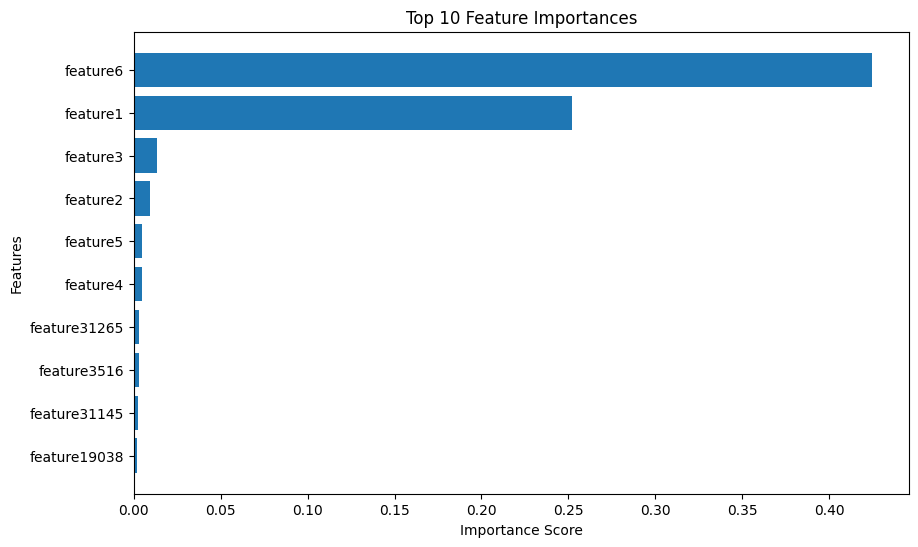

In [72]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Automatically generate feature names based on the number of columns in x_train
num_features = x_train.shape[1]  # Number of columns in x_train
feature_names = [f'feature{i+1}' for i in range(num_features)]  # Generate feature names dynamically

# Convert x_train (which is a NumPy array) to a DataFrame
x_train_df = pd.DataFrame(x_train, columns=feature_names)

# Initialize the RandomForestRegressor with your preferred parameters
rf_model = RandomForestRegressor()

# Train the model on your training data
rf_model.fit(x_train_df, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df1 = pd.DataFrame({
    'Feature': feature_names,  # Actual feature names from the DataFrame
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
top_features = feature_importance_df1.head(10)
print("Top 10 Important Features:")
print(top_features)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], align='center')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [78]:
feature_1_name =df1.columns[0]  
feature_6_name =df1.columns[5]  

print(f"Feature 1 is: {feature_1_name}")
print(f"Feature 6 is: {feature_6_name}")

Feature 1 is: YR
Feature 6 is: BILLED


* #### BILLED(42.45% feature importance):Most crucial factor in predicting residential tax due.
* #### YR(25.20% feature importance):Second most influential feature.

## 14.Hyperparameter Tuning

In [73]:
# tunning the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=120)
clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.9656773893809688

In [79]:
# Define parameter grid for Random Forest Regressor
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train_kbest, y_train)

# Get the best model from grid search
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(x_test_kbest)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) * 100

# Print the results
print("Best Parameters:", grid_search_rf.best_params_)
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    "Model-Name": ["RandomForestRegressor"],
    "RMSE": [rmse],
    "MSE": [mse],
    "MAE": [mae],
    "R2 Score": [r2]
})

results_df.set_index('Model-Name', inplace=True)
print(results_df)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
RMSE: 902.6111967857958
MSE: 814706.9725630864
MAE: 459.3297160604654
R2 Score: 62.80332164051279
                             RMSE            MSE         MAE   R2 Score
Model-Name                                                             
RandomForestRegressor  902.611197  814706.972563  459.329716  62.803322


### The RandomForestRegressor model performs well on my dataset, as indicated by the high R2 score (62.80%). This suggests that the model captures a significant amount of variability in the target variable.

## 15.Model Deployment

In [80]:
import joblib
import os

# Assuming best_rf_model contains your trained Random Forest Regressor model
best_model = best_rf_model  # Replace 'best_rf_model' with your RandomForestRegressor instance

# Define the filename to save the model
filename = 'random_forest_regressor_model.joblib'

# Save the model using joblib
joblib.dump(best_model, filename)
print("Model saved successfully.")

# Check if the model file exists
if os.path.isfile(filename):
    print("Model file exists.")
else:
    print("Model file does not exist.")

# Load the model from the file using joblib
loaded_model = joblib.load(filename)
print("Model loaded successfully.")

Model saved successfully.
Model file exists.
Model loaded successfully.


## 16.Test with unseen data

In [ ]:
# Predict on unseen data
# Assuming new_data is our new unseen data array
new_data = np.random.rand(10,10) #Example of 10 new samples with 7 features each

# Predict on unseen data
predictions = best_model.predict(new_data)
print('Predictions on unseen data:', predictions)

In [ ]:
Predictions on unseen data: [ 413.38985141  746.13490443  554.42157534  705.55187856 1864.74047913
 2661.56673229 1824.1438236  2358.3927442  1970.08364018  622.07510951]

## 17.Interpretation of Results:
* #### Features such as 'YR','BILLED' were found to be significant contributors to the prediction of residential tax_due.
* #### we can say that Year of the property tax payment and The amount billed for taxes are the factors significantly affect the tax due of the property.
* #### other features are showing less impact on tax due prediction 

## Conclusion

### In this project, I aimed to predict residential tax due using a diverse dataset containing various features. Through meticulous data preprocessing, feature engineering, and model selection, I was able to develop and evaluate multiple regression models.

## 18. Limitations:

* most of the features doesn't provide any significant connection with the target variable
* Challenges: Despite achieving a robust model, we encountered limitations such as data quality issues, potential feature correlation, and the absence of external factors that could influence residential tax.
* Feature Importance: Features such as 'YR','BILLED' were found to be significant contributors to the prediction of residential tax_due.
* Had to reduce the dataset size to eliminate the problem of time taken for model training and imbalanced data ('0' values in the target variable)

## 19.Future Work:

### To enhance the predictive performance and reliability of our model, future efforts could focus on:

* Consider adding more features to enhance predictive power
* Addresss imbalanced data through resampling techniques.
* Collect and integrate more diverse and updated data.
* Explore advanced machine learning techniques and model ensembling.